In [1241]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1242]:
#importing neccessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [1243]:
#reading the dataset
df=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ISBSG_data_file.xlsx',header=[0,1])

In [1244]:
df.head()

Unnamed: 0_level_0              Rating               Software Age  \
    ISBSG Project ID Data Quality Rating UFP rating Year of Project   
0              10001                   D          A          1998.0   
1              10003                   B          B          2015.0   
2              10007                   B          B          2016.0   
3              10011                   B          A          1996.0   
4              10012                   B          A          2002.0   

       Major Grouping                                                          \
      Industry Sector                 Organisation Type     Application Group   
0    Service Industry  Recreation & Personnel Services;  Business Application   
1       Communication               Telecommunications;  Business Application   
2       Communication               Telecommunications;  Business Application   
3        Construction                     Construction;  Business Application   
4  Wholesale & Retail                          Billing;  Business Application   

                                                                            \
                    Application Type Development Type Development Platform   
0     Transaction/Production System;  New Development                   MR   
1                    Online. eSales;      Enhancement                Multi   
2  Customer relationship management;      Enhancement                  NaN   
3  Stock control & order processing;  New Development                Multi   
4                           Billing;      Enhancement                  NaN   

   ...   Hrs per Role                                               \
   ... Graphic Artist Developer QA/Tester Training & Documentation   
0  ...            NaN       NaN       NaN                      NaN   
1  ...            NaN       NaN       NaN                      NaN   
2  ...            NaN       NaN       NaN                      NaN   
3  ...            NaN       NaN       NaN                      NaN   
4  ...            NaN       NaN       NaN                      NaN   

                                                                             \
  Database Administrator IT System Administrator Other (1) Other (1) Effort   
0                    NaN                     NaN       NaN              NaN   
1                    NaN                     NaN       NaN              NaN   
2                    NaN                     NaN       NaN              NaN   
3                    NaN                     NaN       NaN              NaN   
4                    NaN                     NaN       NaN              NaN   

                              
  Other (2) Other (2) Effort  
0       NaN              NaN  
1       NaN              NaN  
2       NaN              NaN  
3       NaN              NaN  
4       NaN              NaN  

[5 rows x 252 columns]

In [1245]:
df.shape

(10600, 252)

In [1246]:
df.columns

MultiIndex([('Unnamed: 0_level_0',         'ISBSG Project ID'),
            (            'Rating',      'Data Quality Rating'),
            (            'Rating',               'UFP rating'),
            (      'Software Age',          'Year of Project'),
            (    'Major Grouping',          'Industry Sector'),
            (    'Major Grouping',        'Organisation Type'),
            (    'Major Grouping',        'Application Group'),
            (    'Major Grouping',         'Application Type'),
            (    'Major Grouping',         'Development Type'),
            (    'Major Grouping',     'Development Platform'),
            ...
            (      'Hrs per Role',           'Graphic Artist'),
            (      'Hrs per Role',                'Developer'),
            (      'Hrs per Role',                'QA/Tester'),
            (      'Hrs per Role', 'Training & Documentation'),
            (      'Hrs per Role',   'Database Administrator'),
            (      'Hrs 

In [1247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10600 entries, 0 to 10599
Columns: 252 entries, ('Unnamed: 0_level_0', 'ISBSG Project ID') to ('Hrs per Role', 'Other (2) Effort')
dtypes: datetime64[ns](3), float64(101), int64(1), object(147)
memory usage: 20.4+ MB


In [1248]:
# Columns with datetime64[ns] datatype
datetime_columns = df.select_dtypes(include=['datetime64[ns]']).columns
print("Columns with datetime64[ns] datatype:")
for col in datetime_columns:
    print(col)

Columns with datetime64[ns] datatype:
('Estimates', 'Delivery date estimate')
('Estimates', 'Estimate compilation date')
('Survey data', 'Date user survey')


In [1249]:
df.describe()

Unnamed: 0_level_0    Software Age          Sizing  \
        ISBSG Project ID Year of Project Functional Size   
count       10600.000000    10599.000000     9610.000000   
mean        23318.296604     2007.966223      355.659639   
min         10001.000000     1989.000000        1.000000   
25%         16405.750000     2002.000000       63.000000   
50%         22612.500000     2008.000000      140.000000   
75%         28829.250000     2015.000000      360.000000   
max         52981.000000     2020.000000    19050.000000   
std          8660.142435        7.389686      694.722724   

                                                        \
      Adjusted Function Points Value Adjustment Factor   
count              7552.000000             3332.000000   
mean                393.279897                1.021711   
min                   1.000000                0.300000   
25%                  65.000000                1.000000   
50%                 142.500000                1.000000   
75%                 364.000000                1.040000   
max               20000.000000                1.350000   
std                 892.850822                0.088958   

                              Effort                         \
      Normalised Work Effort Level 1 Normalised Work Effort   
count                    9284.000000            9662.000000   
mean                     3800.357938            4539.002968   
min                         0.000000               0.000000   
25%                       595.750000             697.250000   
50%                      1555.500000            1765.500000   
75%                      3995.000000            4393.000000   
max                    230514.000000          645694.000000   
std                      8029.031881           14313.233835   

                                          Productivity                       \
      Summary Work Effort Normalised Level 1 PDR (ufp) Normalised PDR (ufp)   
count         10112.00000                  8345.000000          8673.000000   
mean           3976.95241                    25.030833            24.857397   
min               0.00000                     0.000000             0.000000   
25%             568.00000                     5.200000             5.500000   
50%            1507.95000                     9.800000            10.300000   
75%            3811.25000                    20.000000            20.400000   
max          645694.00000                  2816.300000          2816.300000   
std           13357.78489                    71.588879            69.604603   

       ...       Hrs per Role                                              \
       ... Software Architect User-Interface Graphic Artist     Developer   
count  ...         139.000000      55.000000      26.000000    204.000000   
mean   ...         855.935252     353.472727     750.961538   2911.362745   
min    ...           0.000000       0.000000       0.000000     20.000000   
25%    ...         128.500000      74.000000       0.000000    412.750000   
50%    ...         360.000000     181.000000       9.000000   1136.000000   
75%    ...         704.500000     448.000000      77.750000   2939.500000   
max    ...       17984.000000    2400.000000   16920.000000  44880.000000   
std    ...        1930.629049     461.453374    3309.130683   5486.161099   

                                                                     \
          QA/Tester Training & Documentation Database Administrator   
count    171.000000                55.000000              46.000000   
mean    1449.222222               198.472727             312.500000   
min        2.000000                 0.000000               0.000000   
25%      166.500000                24.500000               0.000000   
50%      493.000000                79.000000              45.000000   
75%     1508.500000               122.500000             157.500000   
max    30240.000000              1883.000000            3034.00

Rating

In [1250]:
df['Rating'].isnull().sum()

Data Quality Rating      0
UFP rating             694
dtype: int64

In [1251]:
df['Rating']['Data Quality Rating'].value_counts()

Data Quality Rating
B    8295
A    1201
D     695
C     409
Name: count, dtype: int64

Here we are taking projects with data quality rating A and B and droping the rest

In [1252]:
df = df[df['Rating']['Data Quality Rating'].isin(['A', 'B'])]

In [1253]:
df['Rating']['UFP rating'].value_counts()

UFP rating
B    4297
A    3848
C     745
Name: count, dtype: int64

In [1254]:
df.shape

(9496, 252)

In [1255]:
# PERCENTAGE OF MISSING VALUES AND DATA-TYPE OF EACH COLUMNS
def missing(col):
    missing_percentage = round(df[col].isna().sum() / df[col].shape[0] * 100, 2)
    data_type = df[col].dtype if isinstance(df[col], pd.Series) else df[col].iloc[:, 0].dtype
    return pd.DataFrame({'Missing Percentage': missing_percentage, 'Data Type': str(data_type)})

**Feature Selection**

In [1256]:
df = df.drop(columns=['ISBSG Project ID','Data Quality Rating','UFP rating'], level=1)

In [1257]:
missing('Major Grouping')

,Missing Percentage,Data Type
Industry Sector,14.23,object
Organisation Type,21.40,object
Application Group,25.54,object
Application Type,20.38,object
Development Type,0.00,object
Development Platform,42.41,object
Language Type,16.78,object
Primary Programming Language,19.82,object
Count Approach,0.00,object




*   Industry sector and organisation type gives same value.
*  Organisation Type is much more vast and has large unique values, so decides to keep industry sector.
*   same goes for app group and app type, so keeps app type.



In [1258]:
df = df.drop(columns=['Organisation Type', 'Application Group'], level=1)

In [1259]:
missing('Sizing')

,Missing Percentage,Data Type
Functional Size,9.56,float64
Relative Size,1.76,float64
Adjusted Function Points,25.36,float64
Value Adjustment Factor,68.09,float64


In [1260]:
missing('Effort')

,Missing Percentage,Data Type
Normalised Work Effort Level 1,8.10,float64
Normalised Work Effort,4.48,float64
Summary Work Effort,0.00,float64


The two response variables summarized
work effort and normalized work effort are duplicated. Since both essentially encode the
same information we have chosen summarized work effort.--Paper

In [1261]:
df = df.drop(columns=['Normalised Work Effort Level 1', 'Normalised Work Effort'], level=1)

In [1262]:
missing('Productivity')

,Missing Percentage,Data Type
Normalised Level 1 PDR (ufp),17.34,float64
Normalised PDR (ufp),14.04,float64
Pre 2002 PDR,27.53,float64


Normalised PDR (ufp) is generally considered the most reliable and accurate metric for software cost estimation. This is because it utilizes normalized effort for the development team and unadjusted function point count, resulting in more comparable rates across different projects.

In [1263]:
df = df.drop(columns=['Normalised Level 1 PDR (ufp)', 'Pre 2002 PDR'], level=1)

In [1264]:
missing('Other Metrics')

,Missing Percentage,Data Type
Defect Density,82.67,float64
Speed of Delivery,20.32,float64
Manpower Delivery Rate,71.11,float64




*   High missing values in Defect Density



In [1265]:
df = df.drop(columns=['Defect Density'], level=1)

In [1266]:
missing('Schedule')

,Missing Percentage,Data Type
Project Elapsed Time,12.23,object
Project Inactive Time,75.81,object
Implementation Date,14.29,object
Project Activity Scope,28.35,object
Effort Plan,83.90,object
Effort Specify,77.45,object
Effort Design,75.84,object
Effort Build,66.56,object
Effort Test,67.66,object
Effort Implement,79.34,object


Project Elapsed Time represents the total duration of the project, encompassing all phases of development, and provides a comprehensive measure of the time invested in the project.

Effort Breakdown offers the most granular and insightful view of the work effort distribution across the SDLC phases. By analyzing Effort Breakdown across multiple projects, you can identify patterns, assess the relative effort required for each phase, and potentially optimize resource allocation to improve development efficiency and cost management.

In [1267]:
df = df.drop(columns=['Project Inactive Time','Implementation Date', 'Project Activity Scope','Effort Unrecorded'], level=1)

In [1268]:
missing('Effort Attributes')

,Missing Percentage,Data Type
Recording Method,8.98,object
Resource Level,4.49,object
Team Size Group,68.80,object
Max Team Size,68.80,object
Average Team Size,83.27,object
Ratio of Project Work Effort to Non-Project Activity,88.97,object
Percentage of Uncollected Work Effort,91.36,object


Recording Method directly influences the accuracy of the work effort measurements, and Resource Level determines the granularity of the effort data. Both metrics are crucial for software cost estimation as they affect the reliability of cost estimates derived from the reported work effort data.

In [1269]:
df = df.drop(columns=['Ratio of Project Work Effort to Non-Project Activity','Percentage of Uncollected Work Effort'], level=1)

In [1270]:
missing('Project Attributes')

,Missing Percentage,Data Type
CASE Tool Used,77.15,object
Used Methodology,37.94,object
How Methodology Acquired,75.87,object




*   They have high missing values



In [1271]:
df = df.drop(columns=['How Methodology Acquired','CASE Tool Used','Used Methodology'], level=1)

In [1272]:
missing('1st Platform')

,Missing Percentage,Data Type
1st Hardware,68.20,object
1st Language,17.75,object
1st Operating System,67.39,object
Integrated Development Environment,96.42,object
1st Debugging Tool,89.68,object
1st Data Base System,63.35,object
1st Component Server,97.71,object
1st Web Server,94.98,object
1st Message Server,97.85,object
1st Other Platform,87.43,object


In [1273]:
df = df.drop(columns=['1st Hardware','1st Language','1st Operating System','1st Data Base System','Integrated Development Environment','1st Debugging Tool','1st Component Server','1st Web Server','1st Message Server','1st Other Platform'], level=1)

In [1274]:
missing('Documents & Techniques')

,Missing Percentage,Data Type
Development Methodologies,48.43,object
Development Techniques,69.83,object
JAD Method Used,98.08,object
Agile Method Used,89.71,object
Sprints / iterations,92.13,object
Sprints / iterations length,92.68,object
Sprints / iterations size,99.41,object
Prototyping Used,86.07,object
Planning Documents,90.13,object
Specification Documents,90.15,object


In [1275]:
df['Documents & Techniques','Development Techniques'].nunique()

268

Given the large number of unique values, high missing value percentage, and the presence of another column capturing related information, it seems reasonable to consider removing the 'Development Techniques' column.

In [1276]:
df['Documents & Techniques','FP Standards All'].nunique()

172

In FP Standards All, increased complexity due to a larger number of unique values, which may complicate analysis.
Some metrics might be less relevant or infrequently used, leading to noise in the data.

In [1277]:
df['Documents & Techniques','Reference Table Approach'].value_counts()

(Documents & Techniques, Reference Table Approach)
Don't Know;                                            805
Combined all tables into a single file;                551
Count does not include points for code tables;         422
Code data not counted;                                 333
Counted each table as a logical file;                  299
IFPUG rules;                                           147
N/A;                                                    42
Counted as Inputs;                                      28
Counted if maintained through EI or another system      26
Input;                                                  15
not applicable;                                          7
Counted logically only if maintained by user;            5
If business related then counted as entity type;         5
Logically related tables counted as one;                 3
Combined all tables into a single file;Other;            3
Code data not counted;Other;                             2
Count

In [1278]:
df = df.drop(columns=['Development Techniques','JAD Method Used','Agile Method Used','Sprints / iterations','Sprints / iterations length','Functional Sizing Technique','Sprints / iterations size','Prototyping Used','Planning Documents','Specification Documents','Specification Techniques','Design Documents','Design Techniques','Build Products','Build Activity','Test Documents','Test Activity','Implement Documents','Implement Activity','Reference Table Approach','FP Standards All'], level=1)

In [1279]:
missing('Architecture')

,Missing Percentage,Data Type
Architecture,61.87,object
Client Server?,71.21,object
Client Roles,97.05,object
Server Roles,97.19,object
Type of Server,93.86,object
Client/Server Description,90.07,object
Web Development,79.65,object


In [1280]:
df = df.drop(columns=['Architecture','Client Server?','Client Roles','Server Roles','Type of Server','Client/Server Description','Web Development'], level=1)

In [1281]:
missing('Tool data')

,Missing Percentage,Data Type
DBMS Used,64.02,object
Upper CASE Used,81.75,object
Lower CASE Used (with code gen),84.50,object
Lower CASE Used (no code gen),85.05,object
Integrated CASE Used,84.95,object
Other CASE tools?,84.88,object
Other CASE tool names,95.85,object
Staged development?,85.71,object
Project management tools?,83.34,object
Project management tool name,86.12,object


In [1282]:
df = df.drop(columns=['DBMS Used','Upper CASE Used','Lower CASE Used (with code gen)','Lower CASE Used (no code gen)','Integrated CASE Used','Other CASE tools?','Other CASE tool names','Staged development?','Project management tools?','Project management tool name','Debugging tools?','Debugging tool name','Testing tools?','Testing tool name','Performance monitoring tools?','Performance tool name','Other tools?','Other tools name'], level=1)

In [1283]:
missing('Size Attributes')

,Missing Percentage,Data Type
Input count,82.59,float64
Output count,82.59,float64
Enquiry count,82.73,float64
File count,82.59,float64
Interface count,82.73,float64
Added count,78.06,float64
Changed count,88.06,float64
Deleted count,88.06,float64
COSMIC Entry,97.89,float64
COSMIC Exit,97.89,float64


In [1284]:
df = df.drop(columns=['Added count','Changed count','Deleted count','COSMIC Entry','COSMIC Exit','COSMIC Read','COSMIC Write'], level=1)

In [1285]:
missing('Additional data')

,Missing Percentage,Data Type
Portability requirements,91.30,object
Metrics Program,79.89,object
Metrics Program duration,90.29,object
FP training,73.09,object
FP counter experience,91.33,object
FP count frequency,91.45,object
FP counter certification,92.30,object
FP counter membership,92.03,object
Count Tool,87.41,object


In [1286]:
df['Additional data','FP training'].nunique()

52

In [1287]:
df['Additional data','FP training'].value_counts()

(Additional data, FP training)
External course;                                                                                                                                            787
Internal course;                                                                                                                                            537
Course (in-house trainer)                                                                                                                                   228
Course certified by FSM body;                                                                                                                               190
Internal course;Reviewed and supported by Arlan Lesterhuis, who is co-author of the COSMIC Business application guideline and member of the COSMIC MPC.;    154
Reading &/or mentoring;                                                                                                                                     115
Yes Forma

In [1288]:
df = df.drop(columns=['Portability requirements','Metrics Program','FP training','Metrics Program duration','FP counter experience','FP count frequency','FP counter certification','FP counter membership','Count Tool'], level=1)

In [1289]:
missing('Grouping Attributes')

,Missing Percentage,Data Type
Business Area Type,77.59,object
Software Process CMM,98.27,object
Software Process CMMI,96.55,object
Software Process SPICE,100.00,object
Software Process ISO,98.56,object
Software Process TICKIT,100.00,object
Software Process Other,99.64,object
Package Customisation,70.87,object
Degree of Customisation,98.10,object


In [1290]:
df['Grouping Attributes','Business Area Type'].nunique()

123

In [1291]:
df = df.drop(columns=['Business Area Type','Software Process CMM','Software Process CMMI','Software Process SPICE','Software Process ISO','Software Process TICKIT','Software Process Other','Degree of Customisation'], level=1)

In [1292]:
missing('Quality Delivered')

,Missing Percentage,Data Type
Minor Defects,93.31,float64
Major Defects,92.38,float64
Extreme Defects,95.10,float64
Total Defects Delivered,79.98,float64


In [1293]:
df = df.drop(columns=['Minor Defects','Major Defects','Extreme Defects','Total Defects Delivered'], level=1)

In [1294]:
missing('Process')

,Missing Percentage,Data Type
Process improvement pgm?,89.60,object
Decision making process,91.42,object


In [1295]:
df = df.drop(columns=['Process improvement pgm?','Decision making process'], level=1)

In [1296]:
missing('Product Attributes')

,Missing Percentage,Data Type
User Base - Business Units,93.94,object
User Base - Locations,91.93,object
User Base - Distinct Users,94.89,object
User Base - Concurrent Users,92.43,object
Intended Market,55.17,object
Target Platform,93.26,object
Device Embedded,99.89,object


In [1297]:
df = df.drop(columns=['User Base - Business Units','Intended Market','User Base - Locations','User Base - Distinct Users','User Base - Concurrent Users','Target Platform','Device Embedded'], level=1)

In [1298]:
missing('Estimates')

,Missing Percentage,Data Type
Size estimate,93.05,float64
Size estimate approach,92.23,float64
Size estimate method,92.78,float64
Effort estimate,91.60,float64
Effort estimate method,93.30,float64
Delivery date estimate,91.53,float64
Delivery date estimate method,93.65,float64
Cost estimate,98.58,float64
Cost estimate currency,97.57,float64
Cost estimate method,97.43,float64


In [1299]:
df = df.drop(columns=['Size estimate','Size estimate approach','Size estimate method','Effort estimate','Effort estimate method','Delivery date estimate','Delivery date estimate method','Cost estimate','Cost estimate currency','Cost estimate method','Estimating tool','Estimating comments','Estimate compilation date'], level=1)

In [1300]:
missing('Primary project goals')

,Missing Percentage,Data Type
Project objective A all functionality,96.03,float64
Project objective B minimum defects,95.87,float64
Project objective C minimum cost,96.09,float64
Project objective D shortest time,96.08,float64


In [1301]:
df = df.drop(columns=['Project objective A all functionality','Project objective B minimum defects','Project objective C minimum cost','Project objective D shortest time'], level=1)

In [1302]:
missing('Project team')

,Missing Percentage,Data Type
Project user involvement,92.84,object
BA team experience <1 yr,97.11,object
BA team experience 1 to 3 yr,96.90,object
BA team experience >3 yr,96.20,object
IT experience <1 yr,99.40,object
IT experience 1 to 3 yr,99.28,object
IT experience >3 yr,99.14,object
IT experience <3 yr,97.13,object
IT experience 3 to 9 yr,96.41,object
IT experience >9 yr,96.87,object


In [1303]:
df = df.drop(columns=['Project user involvement','BA team experience <1 yr','BA team experience 1 to 3 yr','BA team experience >3 yr','IT experience <1 yr','IT experience 1 to 3 yr','IT experience >3 yr','IT experience <3 yr','IT experience 3 to 9 yr','IT experience >9 yr','Project manage experience','Project manage changes','Personnel changes'], level=1)

In [1304]:
missing('Survey data')

,Missing Percentage,Data Type
User satisfaction survey,92.67,object
Meet stated objectives,97.97,object
Meet business requirements,98.03,object
Quality of functionality,97.99,object
Quality of documentation,97.99,object
Ease of use,98.08,object
Training given,98.11,object
Speed of defining solution,97.89,object
Speed of providing solution,97.87,object
Survey respondent role,98.06,object


In [1305]:
df = df.drop(columns=['User satisfaction survey','Meet stated objectives','Meet business requirements','Quality of functionality','Quality of documentation','Ease of use','Training given','Speed of defining solution','Speed of providing solution','Survey respondent role','User survey comments','Date user survey'], level=1)

In [1306]:
missing('Other Size')

,Missing Percentage,Data Type
Lines of Code,94.84,float64
Lines of Code not Statements,97.70,float64
Other Size Units,99.97,float64


In [1307]:
df = df.drop(columns=['Lines of Code','Lines of Code not Statements','Other Size Units'], level=1)

In [1308]:
missing('Reuse')

,Missing Percentage,Data Type
Software reuse?,94.28,object
Software reuse,97.95,object
Reuse FP count,99.03,object
Reuse FP approach,99.02,object


In [1309]:
df = df.drop(columns=['Software reuse?','Software reuse','Reuse FP count','Reuse FP approach'], level=1)

In [1310]:
missing('Costs')

,Missing Percentage,Data Type
Total project cost,82.65,float64
Cost currency,81.38,float64
Currency multiple,91.56,float64
Plan total cost,98.41,float64
Specify total cost,98.44,float64
Design total cost,98.29,float64
Build total cost,97.70,float64
Test total cost,97.73,float64
Impl total cost,97.79,float64
Overheads included,94.86,float64


Except the target column 'Total project cost', all the other columns that has missing values percentage greater than 90% is removed.

In [1311]:
import pandas as pd

# Assuming df is your DataFrame and columns_to_check is the list of columns
columns_to_check = ['Plan total cost', 'Specify total cost',
                    'Design total cost', 'Build total cost', 'Test total cost',
                    'Impl total cost']  # Replace with your column names

# Create a boolean mask for rows where all specified columns have null values
mask = df['Costs'][columns_to_check].isnull().all(axis=1)

# Filter the DataFrame using the mask
rows_with_null_values = df[mask]

# Print the resulting DataFrame
print(len(rows_with_null_values))

9278


In [1312]:
df = df.drop(columns=['All cost included','Unreported costs','Estimate unreported costs','Cost method description','Cost Confidence Reason','Cost Other Comment','Plan total cost', 'Specify total cost','Design total cost', 'Build total cost', 'Test total cost','Impl total cost','Overheads included','Cost recording method', 'Cost Confidence Level'], level=1)

In [1313]:
missing('Proj Quality')

,Missing Percentage,Data Type
Plan Defects,99.86,float64
Specification Defects,97.48,float64
Design Defects,97.41,float64
Minor Build Defects,99.44,float64
Major Build Defects,99.60,float64
Extreme Build Defects,99.75,float64
Total Build Defects,97.36,float64
Minor Test Defects,95.80,float64
Major Test Defects,95.59,float64
Extreme Test Defects,96.22,float64


In [1314]:
df = df.drop(columns=['Plan Defects','Specification Defects','Design Defects','Minor Build Defects','Major Build Defects','Extreme Build Defects','Total Build Defects','Minor Test Defects','Major Test Defects','Extreme Test Defects','Total Test Defects','Minor Impl Defects','Major Impl Defects','Extreme Impl Defects','Total Impl Defects'], level=1)

In [1315]:
missing('2nd Platform')

,Missing Percentage,Data Type
2nd Hardware,99.87,object
2nd Language,91.66,object
2nd Operating System,98.03,object
2nd Data Base System,98.79,object
2nd Component Server,99.17,object
2nd Web Server,99.04,object
2nd Message Server,99.13,object
2nd Other Platform,99.44,object


In [1316]:
df = df.drop(columns=['2nd Hardware','2nd Language','2nd Operating System','2nd Data Base System','2nd Component Server','2nd Web Server','2nd Message Server','2nd Other Platform'], level=1)

In [1317]:
missing('Hrs per Role')

,Missing Percentage,Data Type
Project Manager,94.39,float64
Business Analyst,98.92,float64
Software Architect,98.61,float64
User-Interface,99.47,float64
Graphic Artist,99.79,float64
Developer,97.96,float64
QA/Tester,98.28,float64
Training & Documentation,99.46,float64
Database Administrator,99.57,float64
IT System Administrator,99.72,float64


In [1318]:
df = df.drop(columns=['Project Manager','Business Analyst','Software Architect','User-Interface','Graphic Artist','Developer','QA/Tester','Training & Documentation','Database Administrator','IT System Administrator','Other (1)','Other (1) Effort','Other (2)','Other (2) Effort'], level=1)

In [1319]:
df.columns

MultiIndex([(          'Software Age',              'Year of Project'),
            (        'Major Grouping',              'Industry Sector'),
            (        'Major Grouping',             'Application Type'),
            (        'Major Grouping',             'Development Type'),
            (        'Major Grouping',         'Development Platform'),
            (        'Major Grouping',                'Language Type'),
            (        'Major Grouping', 'Primary Programming Language'),
            (        'Major Grouping',               'Count Approach'),
            (                'Sizing',              'Functional Size'),
            (                'Sizing',                'Relative Size'),
            (                'Sizing',     'Adjusted Function Points'),
            (                'Sizing',      'Value Adjustment Factor'),
            (                'Effort',          'Summary Work Effort'),
            (          'Productivity',         'Normalised PDR (

In [1320]:
df.shape

(9496, 39)

Feature Correlation

In [1321]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])
# Flatten MultiIndex columns
numeric_df.columns = ['_'.join(col) for col in numeric_df.columns]

In [1322]:
#Any strong correlation between attributes?
corr = numeric_df.corr()
corr_unstacked = corr.unstack()
corr_unstacked_sorted = corr_unstacked.sort_values(kind="quicksort", ascending=False)
corr_df=pd.Series.to_frame(corr_unstacked_sorted, name='correlation')  #Convert Series to DataFrame and name correlation column accordingly.
high_corr_features =  corr_df[corr_df.correlation != 1]  #Remove all 1s that correspond to self correlation
print(high_corr_features.head(60))

                                                                           correlation
Sizing_Functional Size               Sizing_Adjusted Function Points          0.995325
Sizing_Adjusted Function Points      Sizing_Functional Size                   0.995325
                                     Size Attributes_Input count              0.892151
Size Attributes_Input count          Sizing_Adjusted Function Points          0.892151
Schedule_Effort Build                Effort_Summary Work Effort               0.879577
Effort_Summary Work Effort           Schedule_Effort Build                    0.879577
Costs_Total project cost             Schedule_Effort Build                    0.871079
Schedule_Effort Build                Costs_Total project cost                 0.871079
Size Attributes_Input count          Sizing_Functional Size                   0.859048
Sizing_Functional Size               Size Attributes_Input count              0.859048
Size Attributes_File count           Sizing



*   Functional Size has lesser missing values than Adjusted Function Points, So decides to keep Functional Size.
*   Likewise among Total Defects Delivered and Defect Density, the later is removed.

*   Speed of Delivery is kept and Manpower Delivery Rate is removed.


*   Speed of delivery and Summary Work Effort has a high correlation with Functional size and Total Project Cost







In [1323]:
df = df.drop(columns=['Adjusted Function Points','Input count','Output count','Enquiry count','File count','Interface count'], level=1)

In [1324]:
df = df.drop(columns=['Effort Plan','Effort Specify','Effort Design','Effort Build','Effort Test','Effort Implement'], level=1)

In [1325]:
df = df.drop(columns=['Defect Density','Manpower Delivery Rate'], level=1)

In [1326]:
df = df.drop(columns=['Speed of Delivery'], level=1)

**MISSING VALUES HANDLING AND OTHER PREPROCESSING**

In [1327]:
df.columns

MultiIndex([(          'Software Age',              'Year of Project'),
            (        'Major Grouping',              'Industry Sector'),
            (        'Major Grouping',             'Application Type'),
            (        'Major Grouping',             'Development Type'),
            (        'Major Grouping',         'Development Platform'),
            (        'Major Grouping',                'Language Type'),
            (        'Major Grouping', 'Primary Programming Language'),
            (        'Major Grouping',               'Count Approach'),
            (                'Sizing',              'Functional Size'),
            (                'Sizing',                'Relative Size'),
            (                'Sizing',      'Value Adjustment Factor'),
            (                'Effort',          'Summary Work Effort'),
            (          'Productivity',         'Normalised PDR (ufp)'),
            (              'Schedule',         'Project Elapsed 

In [1328]:
df.shape

(9496, 25)

Year of Project

In [1329]:
df['Software Age'].isnull().sum()

Year of Project    0
dtype: int64

In [1330]:
df1 = df.droplevel(0, axis=1)

*MAJOR GROUPING*

In [1331]:
df['Major Grouping'].isnull().sum()

Industry Sector                 1351
Application Type                1935
Development Type                   0
Development Platform            4027
Language Type                   1593
Primary Programming Language    1882
Count Approach                     0
dtype: int64

In [1332]:
df1['Industry Sector'].value_counts()

Industry Sector
Communication                        2378
Insurance                            1369
Government                            908
Manufacturing                         810
Banking                               519
Medical & Health Care                 507
Financial                             409
Service Industry                      174
Wholesale & Retail                    130
Utilities                             127
Electronics & Computers               119
Finance                               118
Construction                           96
Mining                                 95
Logistics                              65
Professional Services                  59
Services                               54
Agriculture, Forestry and Fishing      47
Retail                                 47
Wholesale                              46
Education                              35
Defence                                17
Human resource                         13
Estate            

In [1333]:
value_mapping = {'Financial': 'Finance', 'Retail': 'Wholesale & Retail', 'Wholesale': 'Wholesale & Retail','Estate': 'Real Estate'}
df1['Industry Sector'] = df1['Industry Sector'].replace(value_mapping)

In [1334]:
df1['Application Type'].unique()

array(['Online. eSales;', 'Customer relationship management;',
       'Stock control & order processing;', 'Billing;', nan,
       'Management Information System;', 'Data Warehouse;',
       'Sales contact management;',
       'Financial transaction process/accounting;', 'not recorded;',
       'Management Information System;Linguistic Software;',
       'Transaction/Production System;', 'Financial Transactions;',
       'Trading;', 'Voice Provisioning;',
       'Customer billing/relationship management;', 'Report Generation;',
       'Office Information System;', 'Broadband application;',
       'Financial transaction process/accounting;Client Server;',
       'Workflow support & management;', 'Cars selling;',
       'Financial application area;', 'Electronic Data Interchange;',
       'Computing of the thermodynamic process;', 'SAP ERP;',
       'MS Billing;',
       'Catalogue/register of things or events;Document management;Online analysis and reporting;Workflow support & managemen

In [1335]:
df1['Development Type'].unique()

array(['Enhancement', 'New Development', 'New development',
       'Re-development', 'Migration', 'Mix', 'Re-Development'],
      dtype=object)

Here 'New Development' and 'New development' are same 'Re-development' and Re-Development' are same

In [1336]:
# Replace 'New development' with 'New Development' in the 'Development Type' sub-column
df1['Development Type'] = df1['Development Type'].replace('New development', 'New Development')

In [1337]:
# Replace 'Re-Development' with 'Re-development' in the 'Development Type' sub-column
df1['Development Type'] = df1['Development Type'].replace('Re-Development', 'Re-development')

In [1338]:
df1['Development Type'].value_counts()

Development Type
Enhancement        6986
New Development    2401
Re-development       97
Migration            10
Mix                   2
Name: count, dtype: int64

In [1339]:
df1['Development Platform'].value_counts()

Development Platform
Multi          1940
MF             1747
PC             1209
MR              559
Proprietary      12
Hand Held         1
Laptop            1
Name: count, dtype: int64

In [1340]:
df1['Development Platform'].value_counts()

Development Platform
Multi          1940
MF             1747
PC             1209
MR              559
Proprietary      12
Hand Held         1
Laptop            1
Name: count, dtype: int64

In [1341]:
df1['Language Type'].value_counts()

Language Type
3GL    5115
4GL    2572
ApG     157
5GL      40
2GL      18
APG       1
Name: count, dtype: int64

In [1342]:
# Replace 'APG' with 'ApG' in the 'Language Type' sub-column
df1['Language Type'] = df1['Language Type'].replace('APG', 'ApG')

In [1343]:
df1['Language Type'].value_counts()

Language Type
3GL    5115
4GL    2572
ApG     158
5GL      40
2GL      18
Name: count, dtype: int64

In [1344]:
df1['Primary Programming Language'].unique()

array([nan, 'Java', 'Access', 'COBOL', 'Oracle', 'Shell', 'Siebel',
       'ADS/Online', 'C', 'ColdFusion', 'C#', 'PL/I', 'Visual Basic',
       '.Net', 'SQL', 'PowerBuilder', 'ABAP', 'COOL:Gen',
       'Amdocs framework', 'MATLAB', 'PL/SQL', 'EASYTRIEVE', 'TELON',
       'C++', 'Spreadsheet', 'ABAP 4', 'Visual C++', 'DELPHI',
       'Unix Shell', 'IDEAL', 'ASP', 'ASP.Net', 'RPG', '.NET', 'PHP',
       'Outsystems', 'JavaScript', 'Lotus Notes', 'HTML',
       'Script Language', 'Mixed', 'html / jsp', 'SOA', 'TIBCO',
       'Unknown', 'API Connect', 'UNIFACE', 'Smalltalk', 'VoiceXML',
       'CLIPPER', 'PASCAL', 'Pro*C', 'NATURAL', 'Centura', 'Formspath',
       'FOCUS', 'ProC', 'Assembler', 'Groovy', 'ABF', 'C#.NET',
       'VisualAge', 'HLL/WB', 'CSP', 'MANTIS', 'BPM', 'IEF', 'TNSDL',
       'ClearBasic', 'SAS', 'SaaS', 'C/PRO*C', 'iOS', 'HPS',
       'Periproducer', 'Perl', 'Mendix', 'PowerPlay', 'Ada', 'JSP',
       'STAFFWARE', 'APPS', 'Visual Basic 6.0', 'IIS',
       'Visual Stud

In [1345]:
df1['Primary Programming Language'].replace({
    'JAVA': 'Java',
    '.Net': 'C#/.NET',
    'C#': 'C#/.NET',
    'Visual basic': 'Visual Basic/.NET'
}, inplace=True)

In [1346]:
df1['Count Approach'].value_counts()

Count Approach
IFPUG 4+             6605
NESMA                1183
COSMIC                737
FiSMA                 528
IFPUG old             210
LOC                   164
EFP                    39
Mark II                19
Other                   4
Fuzzy Logic             2
Albrecht                2
Feature Points          2
System Components       1
Name: count, dtype: int64

In [1347]:
df1['Industry Sector'] = df1['Industry Sector'].fillna(df1['Industry Sector'].mode()[0])
df1['Industry Sector'].isnull().sum()

0

In [1348]:
df1['Application Type'] = df1['Application Type'].fillna(df1['Application Type'].mode()[0])
df1['Application Type'].isnull().sum()

0

In [1349]:
df1['Language Type'] = df1['Language Type'].fillna(df1['Language Type'].mode()[0])
df1['Language Type'].isnull().sum()

0

In [1350]:
df1['Primary Programming Language'] = df1.groupby('Language Type')['Primary Programming Language'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))
df1['Primary Programming Language'].isnull().sum()

0

In [1351]:
df1['Development Platform'] = df1.groupby('Primary Programming Language')['Development Platform'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))
df1['Development Platform'].isnull().sum()

0

*SIZING*

In [1352]:
df['Sizing'].isnull().sum()

Functional Size             908
Relative Size               167
Value Adjustment Factor    6466
dtype: int64

In [1353]:
df1['Relative Size'].value_counts()

Relative Size
M1      2986
S       2596
M2      1916
L        719
XS       627
XXS      405
XL        69
XXL       10
XXXL       1
Name: count, dtype: int64

In [1354]:
df1['Value Adjustment Factor'].value_counts()

Value Adjustment Factor
1.000    1640
1.070      84
1.200      84
1.120      78
1.030      59
         ... 
0.785       1
0.935       1
1.310       1
0.720       1
0.835       1
Name: count, Length: 67, dtype: int64

For most projects recently counted this data is not recorded, and the VAF is assumed equal to 1. So this feature is dropped to avoid unneccessary outliers

In [1355]:
df1.drop(columns=['Value Adjustment Factor'], inplace=True)

In [1356]:
df1['Functional Size']=df1['Functional Size'].fillna(df1.groupby('Count Approach')['Functional Size'].transform('median'))
df1['Functional Size']=df1['Functional Size'].fillna(df1.groupby('Application Type')['Functional Size'].transform('median'))
df1['Functional Size']=df1['Functional Size'].fillna(df1.groupby('Industry Sector')['Functional Size'].transform('median'))
df1['Functional Size'].isnull().sum()

0

In [1357]:
df1['Relative Size'] = df1.groupby('Count Approach')['Relative Size'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))
df1['Relative Size'].isnull().sum()

0

*PRODUCTIVITY*

In [1358]:
df['Productivity'].isnull().sum()

Normalised PDR (ufp)    1333
dtype: int64

In [1359]:
df1['Normalised PDR (ufp)'].fillna(df1.groupby('Industry Sector')['Normalised PDR (ufp)'].transform('median'),inplace=True)
df1['Normalised PDR (ufp)'].fillna(df1.groupby('Count Approach')['Normalised PDR (ufp)'].transform('median'),inplace=True)
df1['Normalised PDR (ufp)'].isnull().sum()

0

*Schedule*

In [1360]:
df['Schedule'].isnull().sum()

Project Elapsed Time    1161
dtype: int64

In [1361]:
df1['Project Elapsed Time'].unique()

array([4.4, 1, 2.6, nan, 3, 6.8, 4.3, 7, 4.9, 20, 2.8, 4, 3.9, 13.5, 15,
       15.2, 5.3, 11.9, 12, 5.1, 9, 3.1, 17, 3.7, 1.8, 3.3, 8.4, 5, 1.6,
       1.9, 6.7, 2, 3.2, 4.5, 13.7, 8, 0.1, 12.5, 6, 44, 2.5, 8.8, 60.6,
       2.7, 9.5, 10.8, 0.7, 8.3, 7.6, 13, 2.4, 32, 3.4, 1.5, 10, 6.4, 1.1,
       9.2, 14.3, 1.3, 18, 10.5, 20.2, 16, 5.5, 5.4, 12.4, 12.3, 7.9, 11,
       5.2, 19, 11.6, 17.9, 6.2, 4.2, 3.6, 8.6, 8.2, 24, 11.7, 5.7, 1.7,
       4.1, 11.2, 5.8, 14.1, 15.6, 2.9, 8.5, 0.4, 6.9, 7.3, 33, 2.3, 0.6,
       23, 21.6, 26, 12.8, 5.6, 0.5, 5.9, 9.1, 10.9, 6.3, 7.4, 7.7, 14.4,
       18.7, 7.8, 14, 28, 11.3, 0.65, 26.4, 25.7, 0.36, 14.7, 1.2, 21,
       0.39, 6.1, 0.51, 14.5, 1.4, 38, 6.6, 4.6, 4.7, 35, 13.3, 9.8, 10.6,
       7.1, 2.1, 54.3, 2.2, 13.9, 9.4, 3.5, 0.2, 27, 39, 8.1, 13.8, 8.7,
       7.2, 10.4, 27.6, 9.9, 23.3, 'Unknown', 3.8, 16.7, 7.5, 24.4, 30,
       14.9, 0.9, 11.5, 22, 40, 4.8, 0.8, 10.2, 0.26, 16.6, 15.7, 10.1,
       14.8, 48, 84, 29, 12.7, 10.3, 11.1, 10.7,

In [1362]:
desired_value_count = len(df1[df1['Project Elapsed Time']=='Unknown'])
print(desired_value_count)

9


In [1363]:
df1['Project Elapsed Time']=df1['Project Elapsed Time'].replace('Unknown',np.nan)

In [1364]:
df1['Project Elapsed Time'].fillna(df1.groupby('Relative Size')['Project Elapsed Time'].transform('median'),inplace=True)
df1['Project Elapsed Time'].fillna(df1.groupby('Industry Sector')['Project Elapsed Time'].transform('median'),inplace=True)
df1['Project Elapsed Time'].isnull().sum()

0

*EFFORT ATTRIBUTES*

In [1365]:
df['Effort Attributes'].isnull().sum()

Recording Method      853
Resource Level        426
Team Size Group      6533
Max Team Size        6533
Average Team Size    7907
dtype: int64

In [1366]:
df1['Recording Method'].unique()

array(['Staff hours (recorded)', 'Staff hours (derived)',
       'Recorded work on project tasks each day',
       "'Productive' time only (recorded)", nan,
       'Weekly recording of hours spent by each IS development staff',
       'Recorded total hours each day or week',
       'Recorded hours on each project/day/week', 'Timesheets',
       'Recorded only the total hours worked each day or week',
       'Combination', 'Most recorded, some derived', 'Other Method',
       'All figures converted from $ to hours. Times captured in hours on a monthly basis. Used an average $/hour over the duration of the project.',
       'Mainly Staff Hours (Recorded) with some aspects of "Productive" Time Only (Recorded)',
       'No timesheets recorded by dev. team',
       'Automated by development tool',
       'All figures converted from $ to hours; used average of $/hr over the three years of development',
       'Mainly Staff Hours (Recorded) with a touch of "Productive" Time Only (Recorded)',


In [1367]:
df1['Resource Level'].value_counts()

Resource Level
1.0    8050
4.0     480
3.0     333
2.0     207
Name: count, dtype: int64

In [1368]:
# Droping the columns
df1.drop(columns=['Resource Level','Team Size Group','Recording Method', 'Average Team Size'], inplace=True)

In [1369]:
df1['Max Team Size'].isnull().sum()

6533

In [1370]:
df1['Max Team Size'].fillna(df1.groupby('Development Type')['Max Team Size'].transform('median'),inplace=True)
df1['Max Team Size'].fillna(df1.groupby('Project Elapsed Time')['Max Team Size'].transform('median'),inplace=True)
df1['Max Team Size'].isnull().sum()

0

*DOCUMENTS AND TECHNIQUES*

In [1371]:
df['Documents & Techniques'].isnull().sum()

Development Methodologies    4599
FP Standard                   178
dtype: int64

In [1372]:
df1['FP Standard'].nunique()

76

In [1373]:
df1['FP Standard'].unique()

array(['IFPUG 4.3', 'Addendum to existing standards', 'IFPUG 4.1',
       'IFPUG', 'IFPUG 4', 'NESMA', 'COSMIC 3.0', 'COSMIC-FFP',
       'COSMIC 2.2', 'FiSMA', nan,
       'CPM4.0;Addendum to existing standards;', 'IFPUG 4.2', 'IFPUG 4.0',
       'Symons Mark II', 'IFPUG 4.3.1', 'COSMIC 2.0', 'IFPUG 3;IFPUG 4;',
       'IFPUG 4.0 & Addendum to existing standards', 'NESMA 2.2', 'Other',
       'FP', 'Mark II', 'IFPUG 3', 'IFPUG 4.2.1', 'COSMIC 4.0.2',
       'COSMIC 4.0.1', 'EFP', 'COSMIC', 'Nesma maintenance', 'COSMIC 2.1',
       'NESMA 2.0', 'IFPUG 3.4',
       'IFPUG 4;Addendum to existing standards;', 'IFPUG ', 'not given',
       'IFPUG 2', 'CFFP v2', 'COSMIC 3.0.1', 'CFP', 'SLOC;OO count;',
       'FFP', 'IFPUG/NESMA', 'In-house', 'IFPUG 4 & Other - Unspecified',
       'IFPUG 3;In-house;', 'IFPUG 3;Addendum to existing standards;',
       'COSMIC 4', 'COSMIC 2',
       'IFPUG 3;In-house;Addendum to existing standards;', 'UFPUG mk2',
       'IFPUG 2006 B', 'ISO/IEC FDIS 19761:20

In [1374]:
desired_value_count = len(df1[df1['FP Standard']=='not given'])

# Print the number of rows with the specified value
print(desired_value_count)

11


In [1375]:
df1['FP Standard']=df1['FP Standard'].replace('not given',np.nan)

In [1376]:
df1['Development Methodologies'] = df1.groupby('Count Approach')['Development Methodologies'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else pd.NA))
df1['Development Methodologies'] = df1.groupby('Application Type')['Development Methodologies'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else pd.NA))
df1['Development Methodologies'].isnull().sum()

0

In [1377]:
df1['FP Standard'] = df1.groupby('Development Methodologies')['FP Standard'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else pd.NA))
df1['FP Standard'] = df1.groupby('Count Approach')['FP Standard'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else pd.NA))
df1['FP Standard'].isnull().sum()

0

*GROUPING ATTRIBUTES*

In [1378]:
df['Grouping Attributes'].isnull().sum()

Package Customisation    6730
dtype: int64

In [1379]:
df1['Package Customisation'].value_counts()

Package Customisation
No             2240
Yes             263
Don't Know      259
TIBCO             3
People Soft       1
Name: count, dtype: int64

TIBCO and PeopleSoft are two software company

In [1380]:
df1['Package Customisation'] = df1['Package Customisation'].replace('TIBCO', 'Yes')
df1['Package Customisation'] = df1['Package Customisation'].replace('People Soft', 'Yes')

In [1381]:
df1['Package Customisation'] = df1.groupby('Development Methodologies')['Package Customisation'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else pd.NA))
df1['Package Customisation'] = df1.groupby('Development Platform')['Package Customisation'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else pd.NA))
df1['Package Customisation'].isnull().sum()

0

*COSTS*

In [1382]:
df['Costs'].isnull().sum()

Total project cost    7848
Cost currency         7728
Currency multiple     8695
dtype: int64

In [1383]:
df1['Cost currency'].value_counts()

Cost currency
European, euro                    875
United States, dollar             724
Netherlands, florin                60
United Kingdom, pound sterling     43
Canada, dollar                     34
Australia, dollar                  19
Germany, Mark                       3
India, rupee                        2
South Africa, rand                  1
Chinese, RMB                        1
Switzerland, franc                  1
New Zealand, dollar                 1
Malaysia, Renggette                 1
Ecuador                             1
Brazil, real                        1
TRL                                 1
Name: count, dtype: int64

In [1384]:
value_mapping = {'European, euro': 'EUR', 'United States, dollar': 'USD','Netherlands, florin': 'ANG','United Kingdom, pound sterling': 'GBP','Canada, dollar': 'CAD','Australia, dollar':'AUD','Japan, yen':'JPY','Chinese, RMB':'CNY','India, rupee':'INR','Germany, Mark':'DEM','Brazil, real':'BRL','Malaysia, Renggette':'MYR','Ecuador':'USD','Sweden, krona':'SEK','Switzerland, franc':'CHF','India, Rupees':'INR','New Zealand, dollar':'NZD','South Africa, rand':'ZAR','TRL':'TRY'}
df1['Cost currency'] = df1['Cost currency'].replace(value_mapping)

In [1385]:
df1['Cost currency'].value_counts()

Cost currency
EUR    875
USD    725
ANG     60
GBP     43
CAD     34
AUD     19
DEM      3
INR      2
ZAR      1
CNY      1
CHF      1
NZD      1
MYR      1
BRL      1
TRY      1
Name: count, dtype: int64

In [1386]:
df1['Currency multiple'].value_counts()

Currency multiple
No            796
Yes 1,000       3
Yes 10,000      2
Name: count, dtype: int64

"Yes" in the "Currency Multiple" column means they multiplied the cost by 1000 or 10000 to make it comparable to costs in dollars or other currencies.

Rows with multiples

In [1387]:
df1['Total project cost'].min()

560.0

In [1388]:
# Filter rows where Currency Multiple is 'yes 1000' or 'yes 10000'
filtered_rows = df1[df1['Currency multiple'].isin(['Yes 1,000', 'Yes 10,000'])]
print(filtered_rows[['Cost currency','Currency multiple','Total project cost']])

     Cost currency Currency multiple  Total project cost
121            ZAR         Yes 1,000           2284000.0
225            USD         Yes 1,000             64000.0
2654           USD         Yes 1,000            128000.0
8820           EUR        Yes 10,000            765000.0
8821           EUR        Yes 10,000            765000.0


In [1389]:
# Function to undo the currency multiples
def undo_currency_multiples(row):
    cost = row['Total project cost']
    currency = row['Cost currency']
    multiple = row['Currency multiple']

    if currency in ['ZAR', 'JPY', 'EUR']:
        if multiple == 'Yes 1,000':
            cost = cost / 1000
        elif multiple == 'Yes 10,000':
            cost = cost / 10000

    return cost

df1['Total project cost'] = df1.apply(undo_currency_multiples, axis=1)

In [1390]:
filtered_rows = df1[df1['Currency multiple'].isin(['Yes 1,000', 'Yes 10,000'])]
print(filtered_rows[['Cost currency','Currency multiple','Total project cost']])

     Cost currency Currency multiple  Total project cost
121            ZAR         Yes 1,000              2284.0
225            USD         Yes 1,000             64000.0
2654           USD         Yes 1,000            128000.0
8820           EUR        Yes 10,000                76.5
8821           EUR        Yes 10,000                76.5


Currency

In [1391]:
df1['Year of Project'].min()

1989.0

In [1392]:
df1['Year of Project'].max()

2020.0

In [1393]:
df1[df1["Cost currency"] == "ANG"]["Year of Project"].min()

1998.0

In [1394]:
df1[df1["Cost currency"] == "ANG"]["Year of Project"].max()

2000.0

So the exchange rate of these 4 years only needs to be found

In [1395]:
df1['Year of Project'].dtypes

dtype('float64')

In [1396]:
df1['Year of Project'] = df1['Year of Project'].astype('int64')

Reading exchange rate dataset

In [1397]:
ex=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Exchange_rate.xlsx')

In [1398]:
ex.head()

,Currency,Year,Value
0,AUD,1989,1.264597
1,AUD,1990,1.281057
2,AUD,1991,1.283756
3,AUD,1992,1.361648
4,AUD,1993,1.470560


In [1399]:
eur=df1[df1['Cost currency'] == 'EUR']
eur['Year of Project'].min()

2001

In [1400]:
eur['Year of Project'].max()

2020

Converting to USD

In [1401]:
# Filter the second dataset to include only relevant currencies and years
filtered_ex = ex[ex['Currency'].isin(df1['Cost currency']) & ex['Year'].isin(df1['Year of Project'])]

# Merge the two datasets on 'Year of Project' and 'Cost currency'
merged_df = pd.merge(df1, filtered_ex, how='left', left_on=['Year of Project', 'Cost currency'], right_on=['Year', 'Currency'])

# Calculate the converted cost in USD
merged_df['Total Project Cost (USD)'] = merged_df['Total project cost'] * merged_df['Value']

# Drop unnecessary columns
df1 = merged_df.drop(['Currency', 'Value','Year'], axis=1)

print(df1[['Total project cost','Total Project Cost (USD)']])

      Total project cost  Total Project Cost (USD)
0                    NaN                       NaN
1                    NaN                       NaN
2                    NaN                       NaN
3                    NaN                       NaN
4                    NaN                       NaN
...                  ...                       ...
9491                 NaN                       NaN
9492            509684.0                 570846.08
9493                 NaN                       NaN
9494            581701.0                 686407.18
9495                 NaN                       NaN

[9496 rows x 2 columns]


In [1402]:
df1.drop(columns=['Total project cost','Cost currency', 'Currency multiple'], inplace=True)

In [1403]:
df1.to_csv('currency_check.csv', index=False)

In [1404]:
df1.columns

Index(['Year of Project', 'Industry Sector', 'Application Type',
       'Development Type', 'Development Platform', 'Language Type',
       'Primary Programming Language', 'Count Approach', 'Functional Size',
       'Relative Size', 'Summary Work Effort', 'Normalised PDR (ufp)',
       'Project Elapsed Time', 'Max Team Size', 'Development Methodologies',
       'FP Standard', 'Package Customisation', 'Total Project Cost (USD)'],
      dtype='object')

In [1405]:
df1.shape

(9496, 18)

In [1406]:
df1.columns[df1.isna().any()]

Index(['Total Project Cost (USD)'], dtype='object')

Missing values of all other columns except the cost column is handled now

ENCODING

In [1407]:
df1.shape

(9496, 18)

In [1408]:
df1.columns

Index(['Year of Project', 'Industry Sector', 'Application Type',
       'Development Type', 'Development Platform', 'Language Type',
       'Primary Programming Language', 'Count Approach', 'Functional Size',
       'Relative Size', 'Summary Work Effort', 'Normalised PDR (ufp)',
       'Project Elapsed Time', 'Max Team Size', 'Development Methodologies',
       'FP Standard', 'Package Customisation', 'Total Project Cost (USD)'],
      dtype='object')

In [1409]:
df1.select_dtypes(include='object').columns.tolist()

['Industry Sector',
 'Application Type',
 'Development Type',
 'Development Platform',
 'Language Type',
 'Primary Programming Language',
 'Count Approach',
 'Relative Size',
 'Development Methodologies',
 'FP Standard',
 'Package Customisation']

In [1410]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
for i in df1.columns:
    if df1[i].dtype=='object':
        df1[i]=enc.fit_transform(df1[i].astype(str))

In [1411]:
df1.to_csv('encodedd.csv', index=False)

Now we will deal the outliers of other columns

*DEALING WITH THE OUTLIERS*

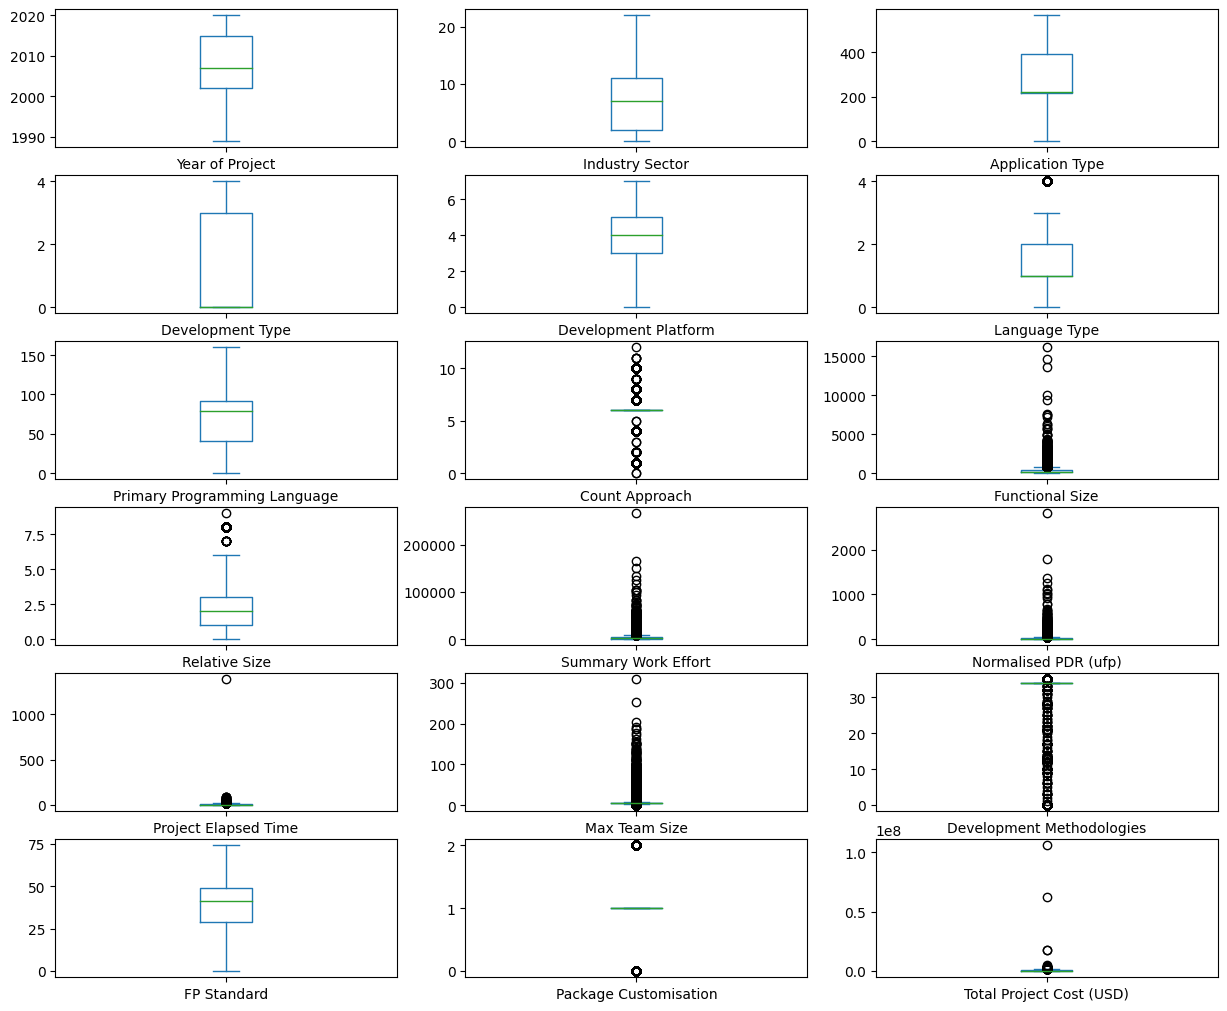

In [1412]:
df1.plot(kind='box',subplots=True,layout=(28,3),figsize=(15, 60))
plt.show()

In [1413]:
from scipy import stats
import numpy as np

# List of columns to check for outliers
columns_with_outliers = ['Functional Size', 'Summary Work Effort', 'Normalised PDR (ufp)', 'Project Elapsed Time', 'Max Team Size']

# Define a threshold for Z-score
threshold = 3

for column in columns_with_outliers:
    # Calculate Z-scores for the column
    z_scores = np.abs(stats.zscore(df1[column]))

    # Identify outliers based on the threshold
    outliers = np.where(z_scores > threshold)[0]

    # Print the number of outliers
    print(f"Number of outliers in {column}: {len(outliers)}")


Number of outliers in Functional Size: 169
Number of outliers in Summary Work Effort: 144
Number of outliers in Normalised PDR (ufp): 122
Number of outliers in Project Elapsed Time: 14
Number of outliers in Max Team Size: 193


In [1414]:
from scipy import stats
import numpy as np

# Assume df1 is your original DataFrame
X = df1.drop(['Total Project Cost (USD)'], axis=1)

# Calculate Z-scores
z_scores = np.abs(stats.zscore(X))

threshold = 4

# Identify rows where all z-scores are below the threshold
inliers_mask = (z_scores < threshold).all(axis=1)

# Remove outliers
X_cleaned = X[inliers_mask]

# Add the 'Total Project Cost (USD)' column back to X_cleaned
X_cleaned['Total Project Cost (USD)'] = df1.loc[inliers_mask, 'Total Project Cost (USD)']

In [1415]:
X_cleaned.shape

(8501, 18)

Missing values in Target column

In [1416]:
dt = X_cleaned.copy()

In [1417]:
dt['Total Project Cost (USD)'].describe()

count    1.389000e+03
mean     4.780027e+05
std      3.330836e+06
min      1.063350e+02
25%      6.286400e+04
50%      2.191990e+05
75%      4.980520e+05
max      1.058399e+08
Name: Total Project Cost (USD), dtype: float64

In [1418]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Separate the dataset into two parts: one with missing values and one without
dt_missing = dt[dt['Total Project Cost (USD)'].isnull()]
dt_not_missing = dt.dropna(subset=['Total Project Cost (USD)'])

# Select independent variables (features) and the target variable
X = dt_not_missing.drop(['Total Project Cost (USD)'], axis=1)
y = dt_not_missing['Total Project Cost (USD)']

# Log transform the target variable
y_log = np.log1p(y)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_log, test_size=0.2, random_state=42)

# Initialize models
model1 = LinearRegression()
model2 = RandomForestRegressor(random_state=42)
model3 = GradientBoostingRegressor(random_state=42)

# Fit models on the training data
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

# Predict on the validation set
pred1_val = model1.predict(X_val)
pred2_val = model2.predict(X_val)
pred3_val = model3.predict(X_val)

# Combine predictions (simple average in this case)
combined_predictions_val = np.mean([pred1_val, pred2_val, pred3_val], axis=0)

# Calculate validation RMSE
rmse_val = np.sqrt(mean_squared_error(y_val, combined_predictions_val))
print(f'Validation RMSE: {rmse_val}')

# Predict the missing values using each model
X_missing = dt_missing.drop(['Total Project Cost (USD)'], axis=1)
X_missing_scaled = scaler.transform(X_missing)

pred1 = model1.predict(X_missing_scaled)
pred2 = model2.predict(X_missing_scaled)
pred3 = model3.predict(X_missing_scaled)

# Combine predictions (simple average in this case)
combined_predictions = np.mean([pred1, pred2, pred3], axis=0)

# Transform predictions back to the original scale
combined_predictions_exp = np.expm1(combined_predictions)

# Ensure no negative predictions
combined_predictions_exp[combined_predictions_exp < 0] = 0

# Impute the missing values
dt.loc[dt['Total Project Cost (USD)'].isnull(), 'Total Project Cost (USD)'] = combined_predictions_exp

# Describe the 'Total Project Cost (USD)' column
print(dt['Total Project Cost (USD)'].describe())

Validation RMSE: 0.6230361177925139
count    8.501000e+03
mean     2.170862e+05
std      1.386815e+06
min      1.063350e+02
25%      3.911033e+04
50%      8.400357e+04
75%      1.859327e+05
max      1.058399e+08
Name: Total Project Cost (USD), dtype: float64


In [1419]:
dt.to_csv('after_miss.csv', index=False)

In [1420]:
columns_with_missing_values = dt.columns[dt.isna().any()]
print(columns_with_missing_values)

Index([], dtype='object')


In [1421]:
dt.columns

Index(['Year of Project', 'Industry Sector', 'Application Type',
       'Development Type', 'Development Platform', 'Language Type',
       'Primary Programming Language', 'Count Approach', 'Functional Size',
       'Relative Size', 'Summary Work Effort', 'Normalised PDR (ufp)',
       'Project Elapsed Time', 'Max Team Size', 'Development Methodologies',
       'FP Standard', 'Package Customisation', 'Total Project Cost (USD)'],
      dtype='object')

In [1422]:
dt.shape

(8501, 18)

Checking for duplicates

In [1423]:
duplicate_rows = dt[dt.duplicated()]
print("Number of duplicate rows:", len(duplicate_rows))

Number of duplicate rows: 28


In [1424]:
# Remove duplicate rows from the DataFrame
dt = dt.drop_duplicates()
print("Number of rows after removing duplicates:", len(dt))

Number of rows after removing duplicates: 8473


In [1425]:
# Save the DataFrame to a CSV file
dt.to_csv('processed_dataset.csv', index=False)